In [1]:
# I import the modules I will need.
import pandas as pd
import json
import requests
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

First indicator that I look at : Total number of new entrants in the first grade of primary education, 
regardless of age, expressed as a percentage of the population at the official primary school-entrance age. 
A high GIR indicates a high degree of access to primary education. As this calculation includes all new entrants 
in Grade 1 (regardless of age), the ratio can exceed 100% due to over-aged and under-aged children entering 
primary school for the first time.
I do that for both females and males and then I export the data to do a plot in Tableau.

In [2]:
'''Firstly, I read the API data for females. I add an extra column to indicate the gender.''' 

response = requests.get("http://api.worldbank.org/countries/indicators/SE.PRM.GINT.FE.ZS?per_page=13900&date=1960:2016&format=json")
data = response.json()
df = pd.read_json(json.dumps(data[1]))
# I need to clean the DataFrame, as per usual
df['country_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df['country'])))
df['indicator_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df['indicator'])))
df = df.dropna()
df['Gender'] = 'Female'

In [3]:
'''I do the same for males - I read the data and add a column indicating the gender.'''
response = requests.get("http://api.worldbank.org/countries/indicators/SE.PRM.GINT.MA.ZS?per_page=13900&date=1960:2016&format=json")
data = response.json()
df2 = pd.read_json(json.dumps(data[1]))
# I need to clean the DataFrame, as per usual
df2['country_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df2['country'])))
df2['indicator_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df2['indicator'])))
df2 = df2.dropna()
df2['Gender'] = 'Male'

In [4]:
'''I can now concatenate the two dataframes.'''
frames = [df, df2]
result = pd.concat(frames)

In [5]:
# I want to look at the high-income countries first.
highincome = result[result['country_cleaned'] == 'High income']
highincome.to_csv("highincome.csv")

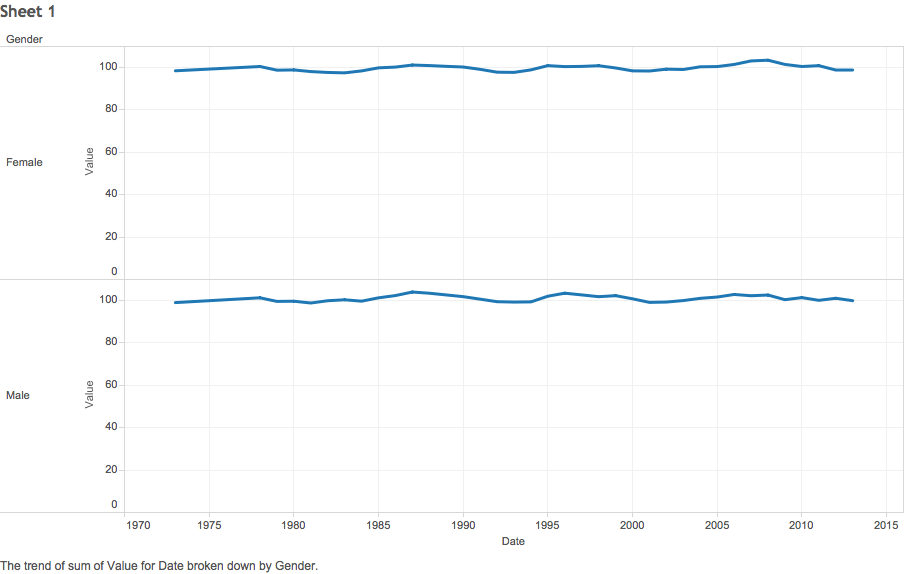

In [7]:
# Here I can see the graph for the high-income countries.
from IPython.display import Image
Image(filename='highincome1.png')

In [8]:
# I then look at middle-income countries.
midincome = result[result['country_cleaned'] == 'Middle income']
midincome.to_csv("midincome.csv")

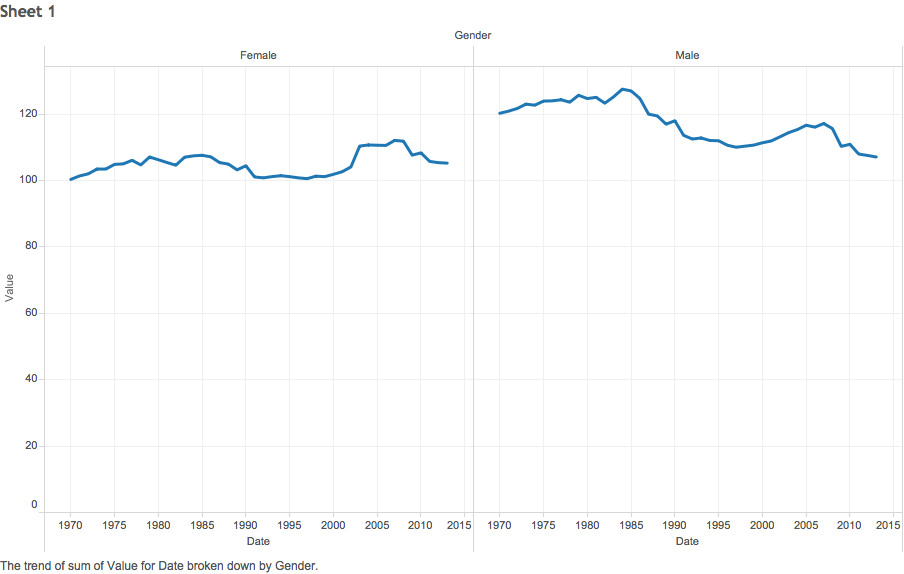

In [9]:
# Again, I create the visualisation in Tableau and then present it here.
Image(filename='midincome1.png')
# I decide that side by side representation is a lot better for comparison than the previous representation.

In [10]:
# Finally, I look at the low-income countries.
lowincome = result[result['country_cleaned'] == 'Low income']
lowincome.to_csv("lowincome.csv")

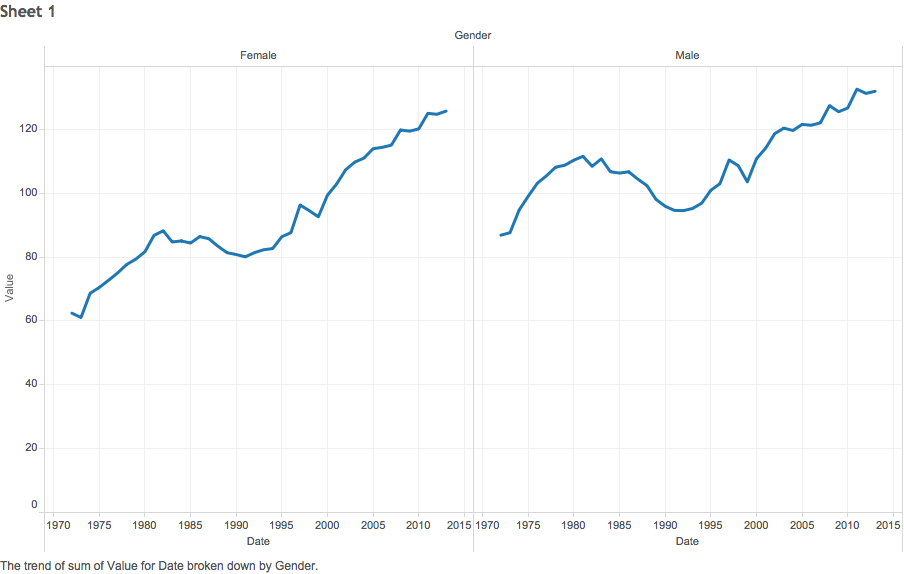

In [11]:
# I import the image I created in Tableau.
Image(filename='lowincome1.png')

In [ ]:
'''There does not seem to be a lot of difference for high-income countries. Sadly, there
is a discrepancy for boys and girls in mid-income countries, which is even bigger for countries
with low-income. It also looks like for poorer countries, there are a lot more kids in primary
school than there are expected at this age - that may indicate that there are a lot of repeaters.'''

In [8]:
'''I wanted to look at the number of repeaters in primary school and how that relates to the previous graph.
Sadly I do not have the data for high income, mid-income and low-income levels - the files that I get
are empty.
'''

In [16]:
# Again, first I look at the data for females.
response = requests.get("http://api.worldbank.org/countries/indicators/SE.PRM.REPT.FE.ZS?per_page=100&date=1960:2016&format=json")
data = response.json()
df3 = pd.read_json(json.dumps(data[1]))
# I need to clean the DataFrame, as per usual
df3['country_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df3['country'])))
df3['indicator_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df3['indicator'])))
# I now want to drop duplicates to see which countries I have values for.
df3 = df3.dropna()
df3['Gender'] = 'Female'

In [17]:
# I then look at the data for males.
response = requests.get("http://api.worldbank.org/countries/indicators/SE.PRM.REPT.MA.ZS?per_page=100&date=1960:2016&format=json")
data = response.json()
df4 = pd.read_json(json.dumps(data[1]))
# I need to clean the DataFrame, as per usual
df4['country_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df4['country'])))
df4['indicator_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df4['indicator'])))
# I now want to drop duplicates to see which countries I have values for.
df4 = df4.dropna()
df4['Gender'] = 'Male'

In [18]:
'''I can now concatenate the two dataframes.'''
frames2 = [df3, df4]
result2 = pd.concat(frames2)

In [19]:
# Again, I start by looking at high-income countries.
highincome2 = result2[result2['country_cleaned'] == 'High income']
highincome2.to_csv("highincome2.csv")
# This is an empty file.

In [20]:
# I then look at middle-income countries.
midincome2 = result2[result2['country_cleaned'] == 'Middle income']
midincome2.to_csv("midincome2.csv")
# This is an empty file.

In [21]:
# Finally, I look at the low-income countries.
lowincome2 = result2[result2['country_cleaned'] == 'Low income']
lowincome2.to_csv("lowincome2.csv")
# This is an empty file.

In [ ]:
'''I want to look at the out of school children - both female and male.'''

In [22]:
# First, I get the data for females.
response = requests.get("http://api.worldbank.org/countries/indicators/SE.PRM.UNER.FE?per_page=13000&date=1960:2016&format=json")
data = response.json()
df5 = pd.read_json(json.dumps(data[1]))
# I need to clean the DataFrame, as per usual
df5['country_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df5['country'])))
df5['indicator_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df5['indicator'])))
# I now want to drop duplicates to see which countries I have values for.
df5 = df5.dropna()
df5['Gender'] = 'Female'

In [23]:
# I then look at the data for males.
response = requests.get("http://api.worldbank.org/countries/indicators/SE.PRM.UNER.MA?per_page=13000&date=1960:2016&format=json")
data = response.json()
df6 = pd.read_json(json.dumps(data[1]))
# I need to clean the DataFrame, as per usual
df6['country_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df6['country'])))
df6['indicator_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df6['indicator'])))
# I now want to drop duplicates to see which countries I have values for.
df6 = df6.dropna()
df6['Gender'] = 'Male'

In [24]:
# I now concatenate these two tables.
'''I can now concatenate the two dataframes.'''
frames3 = [df5, df6]
result3 = pd.concat(frames3)

In [25]:
# Again, I start by looking at high-income countries.
highincome3 = result3[result3['country_cleaned'] == 'High income']
highincome3.to_csv("highincome3.csv")

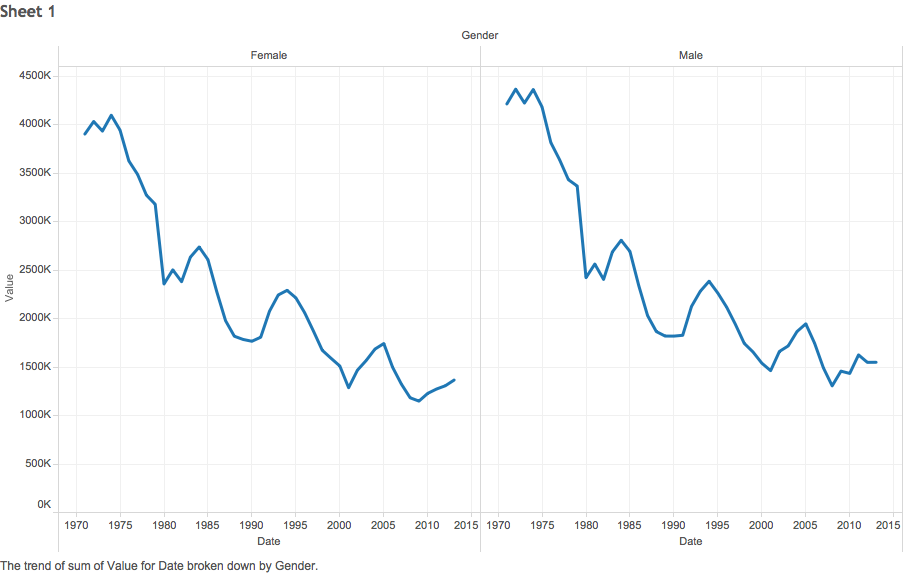

In [26]:
# I now want to read the image from Tableau
Image(filename='highincome3.png')

In [27]:
# I then look at middle-income countries.
midincome3 = result3[result3['country_cleaned'] == 'Middle income']
midincome3.to_csv("midincome3.csv")

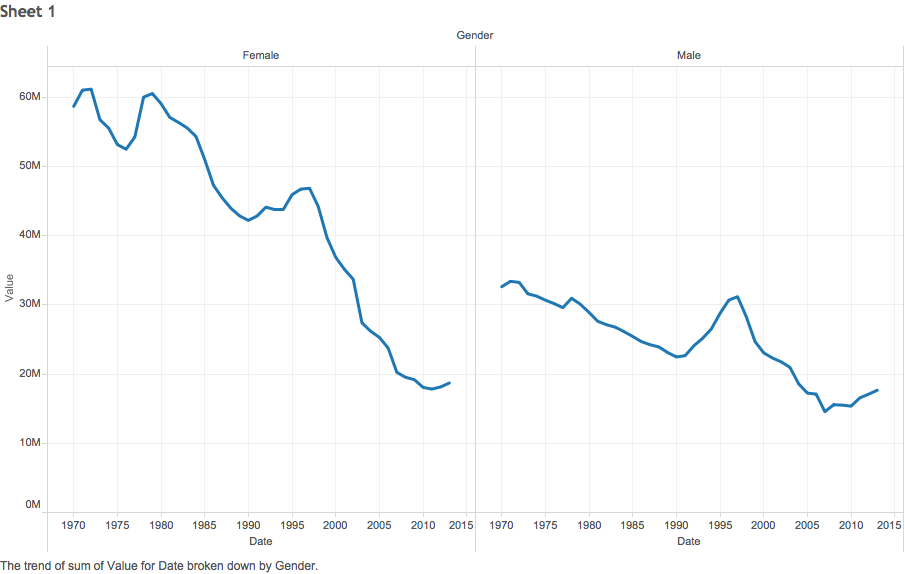

In [28]:
# I now import the Tableau image for mid-income countries.
Image(filename='midincome3.png')

In [30]:
# Finally, I look at the low-income countries.
lowincome3 = result3[result3['country_cleaned'] == 'Low income']
lowincome3.to_csv("lowincome3.csv")

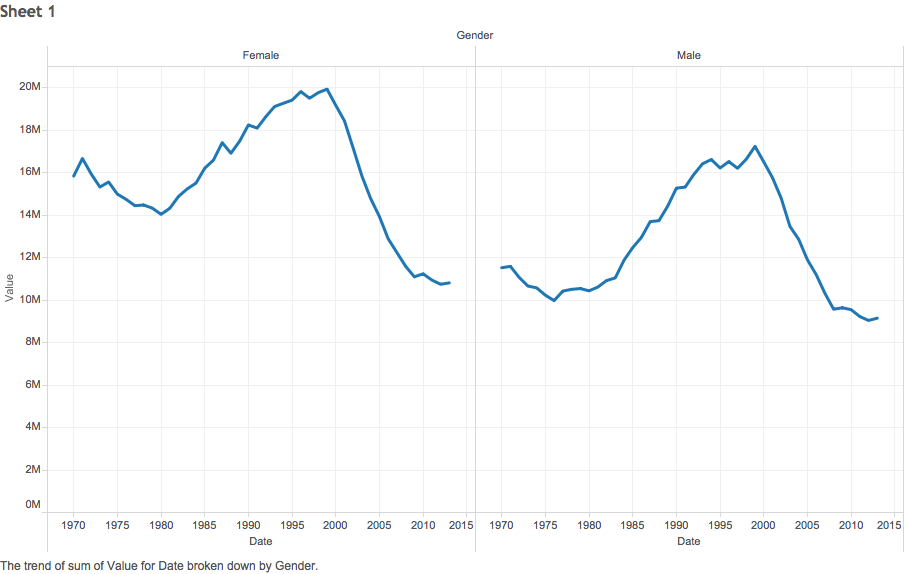

In [31]:
Image(filename='lowincome3.png')

In [ ]:
# I want to now look at primary completion rate.

In [32]:
# First, I get the data for females.
response = requests.get("http://api.worldbank.org/countries/indicators/SE.PRM.CMPT.FE.ZS?per_page=13000&date=1960:2016&format=json")
data = response.json()
df7 = pd.read_json(json.dumps(data[1]))
# I need to clean the DataFrame, as per usual
df7['country_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df7['country'])))
df7['indicator_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df7['indicator'])))
# I now want to drop duplicates to see which countries I have values for.
df7 = df7.dropna()
df7['Gender'] = 'Female'

In [33]:
# I then look at the data for males.
response = requests.get("http://api.worldbank.org/countries/indicators/SE.PRM.CMPT.MA.ZS?per_page=13000&date=1960:2016&format=json")
data = response.json()
df8 = pd.read_json(json.dumps(data[1]))
# I need to clean the DataFrame, as per usual
df8['country_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df8['country'])))
df8['indicator_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df8['indicator'])))
# I now want to drop duplicates to see which countries I have values for.
df8 = df8.dropna()
df8['Gender'] = 'Male'

In [34]:
# I now finally want to look at the data for both sexes.
response = requests.get("http://api.worldbank.org/countries/indicators/SE.PRM.CMPT.MA.ZS?per_page=13000&date=1960:2016&format=json")
data = response.json()
df9 = pd.read_json(json.dumps(data[1]))
# I need to clean the DataFrame, as per usual
df9['country_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df9['country'])))
df9['indicator_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df9['indicator'])))
# I now want to drop duplicates to see which countries I have values for.
df9 = df9.dropna()
df9['Gender'] = 'Both sexes'

In [36]:
'''I can now concatenate the three dataframes.'''
frames4 = [df7, df8, df9]
result4 = pd.concat(frames4)

In [37]:
# Again, I start by looking at high-income countries.
highincome4 = result4[result4['country_cleaned'] == 'High income']
highincome4.to_csv("highincome4.csv")

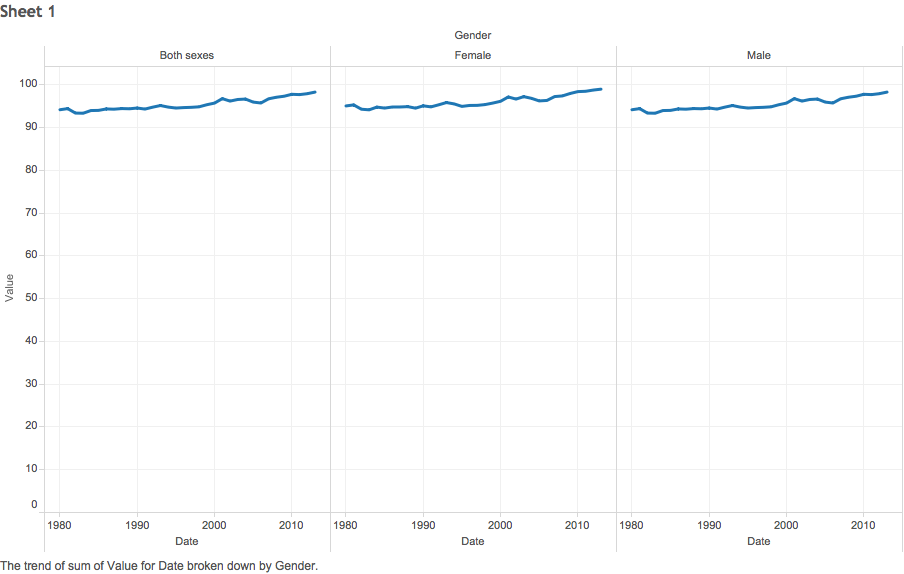

In [38]:
# I now do a graphic presentation in Tableau.
Image(filename='highincome4.png')

In [39]:
# I then look at middle-income countries.
midincome4 = result4[result4['country_cleaned'] == 'Middle income']
midincome4.to_csv("midincome4.csv")

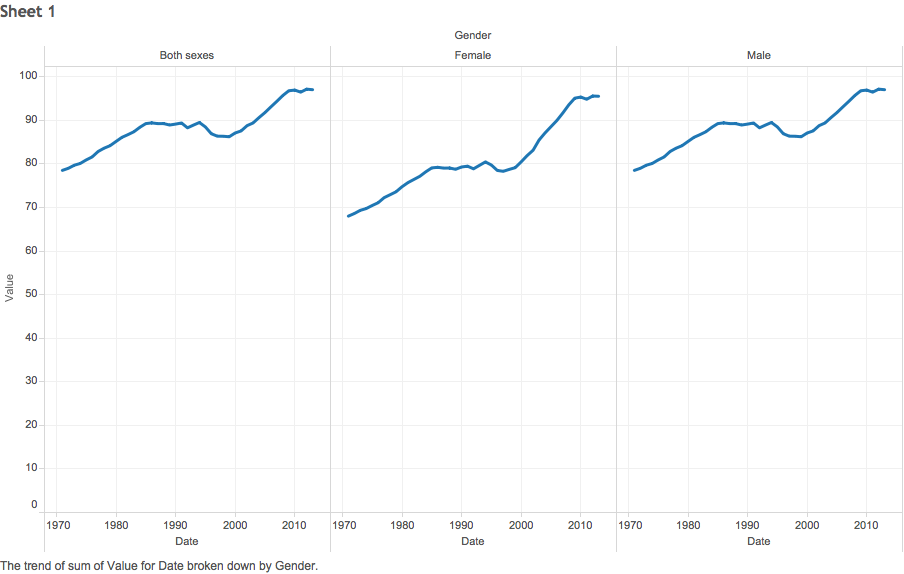

In [40]:
# I now do a graphic presentation in Tableau.
Image(filename='midincome4.png')

In [41]:
# Finally, I look at the low-income countries.
lowincome4 = result4[result4['country_cleaned'] == 'Low income']
lowincome4.to_csv("lowincome4.csv")

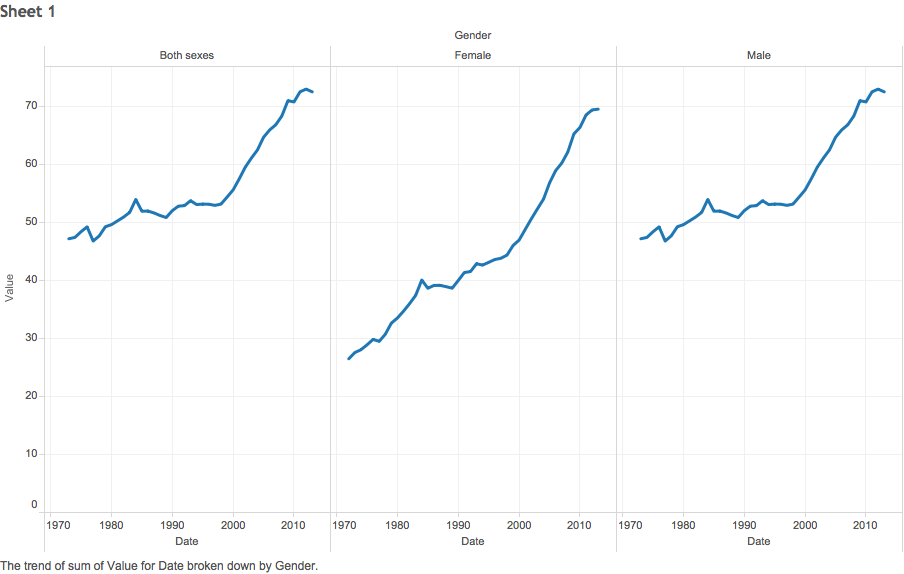

In [42]:
# I now do a graphic presentation in Tableau.
Image(filename='lowincome4.png')

In [ ]:
'''Survival rate to the last grade of primary school.'''

In [43]:
# First, I get the data for females.
response = requests.get("http://api.worldbank.org/countries/indicators/SE.PRM.PRSL.FE.ZS?per_page=13000&date=1960:2016&format=json")
data = response.json()
df10 = pd.read_json(json.dumps(data[1]))
# I need to clean the DataFrame, as per usual
df10['country_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df10['country'])))
df10['indicator_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df10['indicator'])))
# I now want to drop duplicates to see which countries I have values for.
df10 = df10.dropna()
df10['Gender'] = 'Female'

In [44]:
# I then look at the data for males.
response = requests.get("http://api.worldbank.org/countries/indicators/SE.PRM.PRSL.MA.ZS?per_page=13000&date=1960:2016&format=json")
data = response.json()
df11 = pd.read_json(json.dumps(data[1]))
# I need to clean the DataFrame, as per usual
df11['country_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df11['country'])))
df11['indicator_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df11['indicator'])))
# I now want to drop duplicates to see which countries I have values for.
df11 = df11.dropna()
df11['Gender'] = 'Male'

In [45]:
'''I can now concatenate the two dataframes.'''
frames5 = [df10, df11]
result5 = pd.concat(frames5)

In [46]:
# Again, I start by looking at high-income countries.
highincome5 = result5[result5['country_cleaned'] == 'High income']
highincome5.to_csv("highincome5.csv")

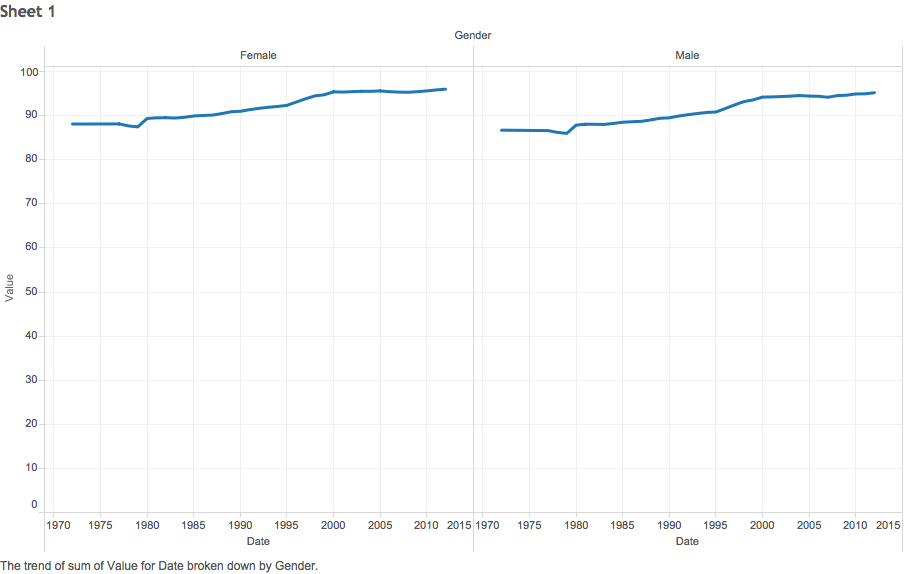

In [47]:
# I now do a graphic presentation in Tableau.
Image(filename='highincome5.png')

In [49]:
# I then look at middle-income countries.
midincome5 = result5[result5['country_cleaned'] == 'Middle income']
midincome5.to_csv("midincome5.csv")

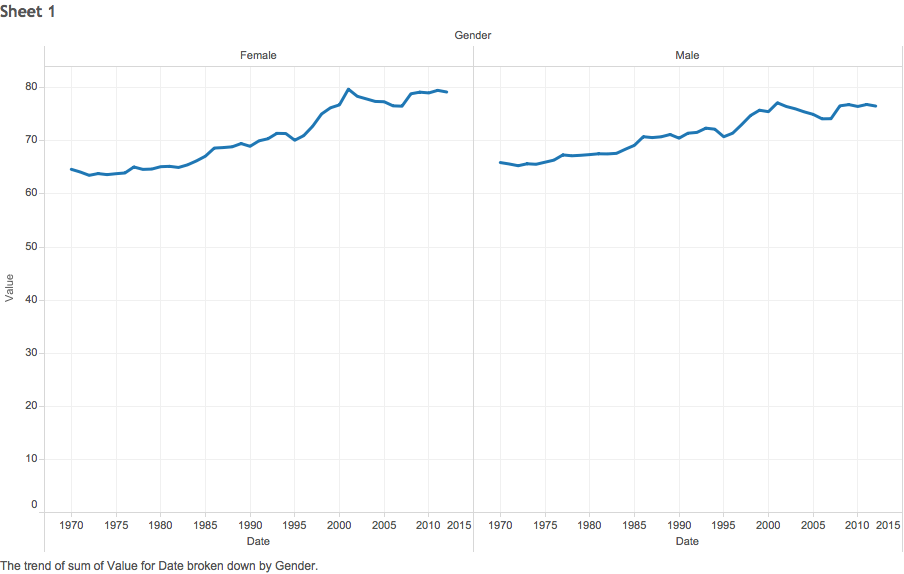

In [50]:
# I now do a graphic presentation in Tableau.
Image(filename='midincome5.png')

In [51]:
# Finally, I look at the low-income countries.
lowincome5 = result5[result5['country_cleaned'] == 'Low income']
lowincome5.to_csv("lowincome5.csv")

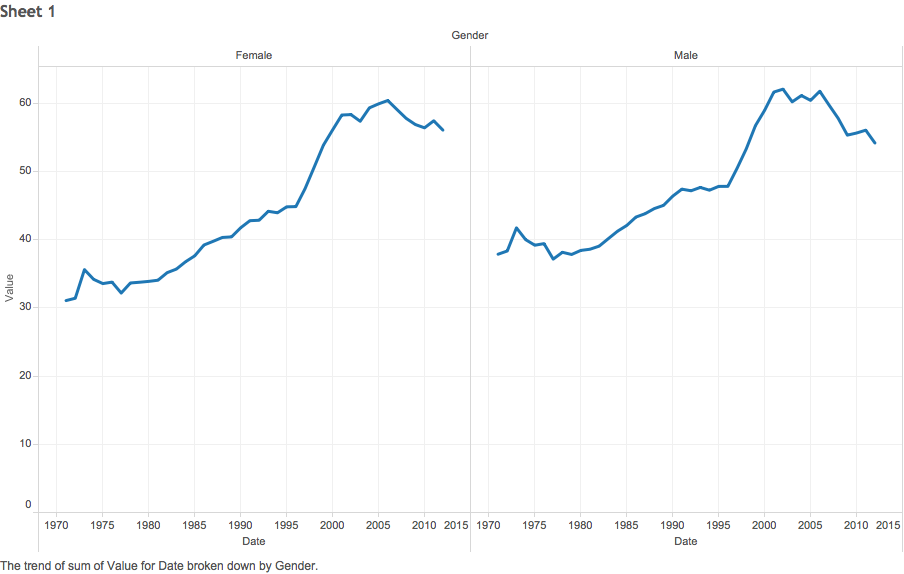

In [52]:
# I now import the graphics from Tableau.
Image(filename='lowincome5.png')

In [ ]:
'''Youth literacy age'''

In [53]:
# Again, I get the data for females.
response = requests.get("http://api.worldbank.org/countries/indicators/SE.ADT.1524.LT.FE.ZS?per_page=13000&date=1960:2016&format=json")
data = response.json()
df12 = pd.read_json(json.dumps(data[1]))
# I need to clean the DataFrame, as per usual
df12['country_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df12['country'])))
df12['indicator_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df12['indicator'])))
# I now want to drop duplicates to see which countries I have values for.
df12 = df12.dropna()
df12['Gender'] = 'Female'

In [54]:
# I then look at the data for males.
response = requests.get("http://api.worldbank.org/countries/indicators/SE.ADT.1524.LT.MA.ZS?per_page=13000&date=1960:2016&format=json")
data = response.json()
df13 = pd.read_json(json.dumps(data[1]))
# I need to clean the DataFrame, as per usual
df13['country_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df13['country'])))
df13['indicator_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df13['indicator'])))
# I now want to drop duplicates to see which countries I have values for.
df13 = df13.dropna()
df13['Gender'] = 'Male'

In [55]:
# I also look at both sexes.
response = requests.get("http://api.worldbank.org/countries/indicators/SE.PRM.CMPT.MA.ZS?per_page=13000&date=1960:2016&format=json")
data = response.json()
df14 = pd.read_json(json.dumps(data[1]))
# I need to clean the DataFrame, as per usual
df14['country_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df14['country'])))
df14['indicator_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df14['indicator'])))
# I now want to drop duplicates to see which countries I have values for.
df14 = df14.dropna()
df14['Gender'] = 'Both sexes'

In [56]:
'''I can now concatenate the three dataframes.'''
frames6 = [df12, df13, df14]
result6 = pd.concat(frames6)

In [58]:
# Again, I start by looking at high-income countries.
highincome6 = result6[result6['country_cleaned'] == 'High income']
highincome6.to_csv("highincome6.csv")

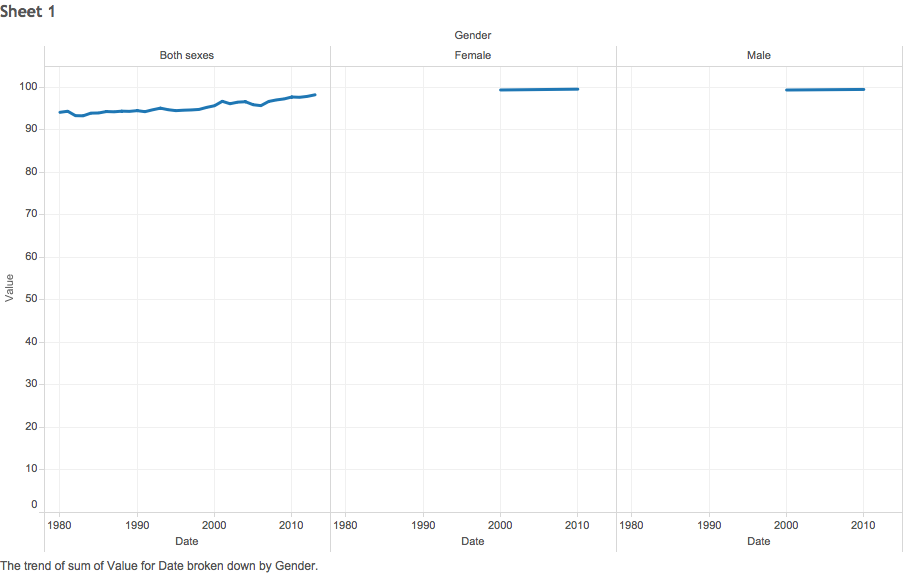

In [59]:
# I read the image I created in Tableau.
Image(filename='highincome6.png')

In [60]:
# I then look at middle-income countries.
midincome6 = result6[result6['country_cleaned'] == 'Middle income']
midincome6.to_csv("midincome6.csv")

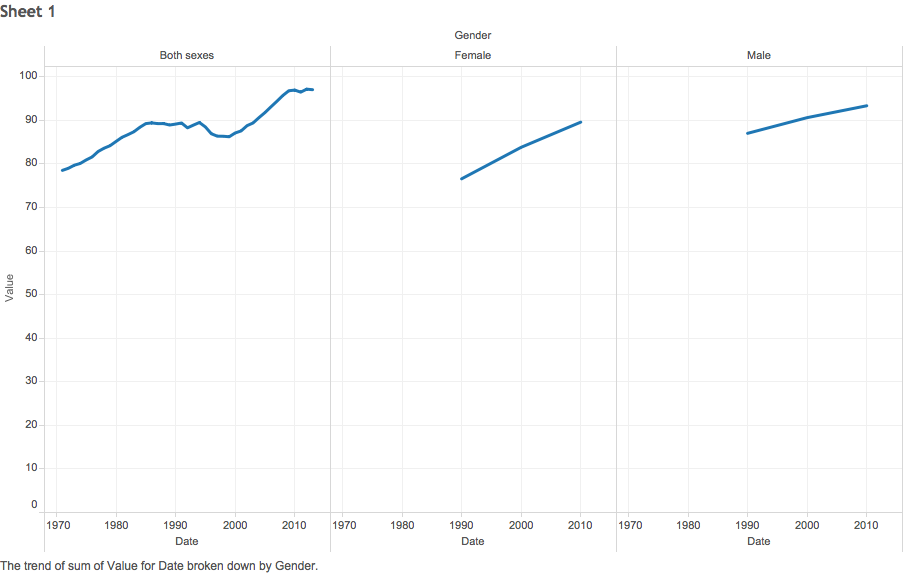

In [61]:
# I read the image I created in Tableau.
Image(filename='midincome6.png')

In [62]:
# Finally, I look at the low-income countries.
lowincome6 = result6[result6['country_cleaned'] == 'Low income']
lowincome6.to_csv("lowincome6.csv")

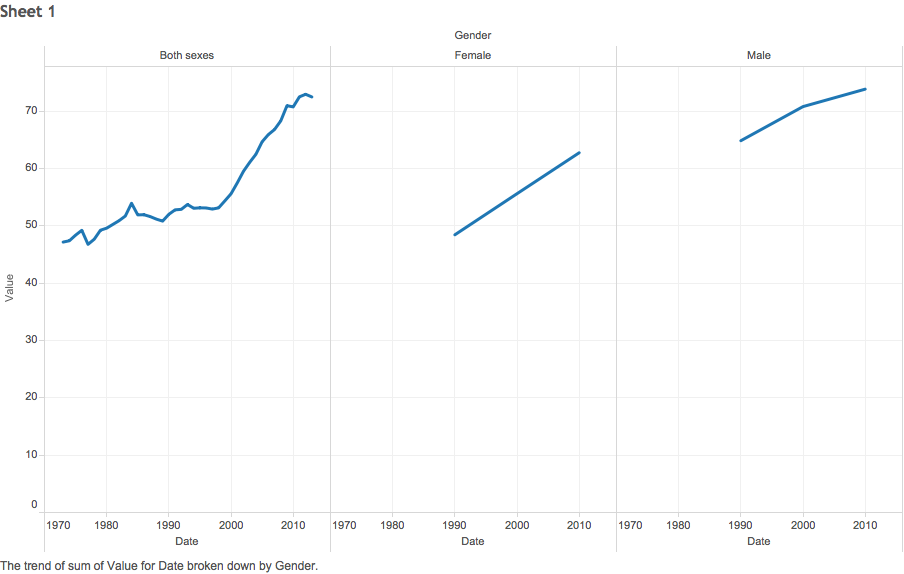

In [63]:
# I now show the image I produced in Tableau.
Image(filename='lowincome6.png')

In [ ]:
'''I want to look at the Effective Transition from Primary to Secondary'''

In [64]:
# Again, I get the data for females.
response = requests.get("http://api.worldbank.org/countries/indicators/SE.SEC.PROG.FE.ZS?per_page=13900&date=1960:2016&format=json")
data = response.json()
df15 = pd.read_json(json.dumps(data[1]))
# I need to clean the DataFrame, as per usual
df15['country_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df15['country'])))
df15['indicator_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df15['indicator'])))
# I now want to drop duplicates to see which countries I have values for.
df15 = df15.dropna()
df15['Gender'] = 'Female'

In [68]:
# I then look at the data for males.
response = requests.get("http://api.worldbank.org/countries/indicators/SE.SEC.PROG.MA.ZS?per_page=13900&date=1960:2016&format=json")
data = response.json()
df16 = pd.read_json(json.dumps(data[1]))
# I need to clean the DataFrame, as per usual
df16['country_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df16['country'])))
df16['indicator_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df16['indicator'])))
# I now want to drop duplicates to see which countries I have values for.
df16 = df16.dropna()
df16['Gender'] = 'Male'

In [69]:
# I now concatenate the two dataframes.
frames7 = [df15, df16]
result7 = pd.concat(frames7)

In [70]:
# Again, I start by looking at high-income countries.
highincome7 = result7[result7['country_cleaned'] == 'High income']
highincome7.to_csv("highincome7.csv")

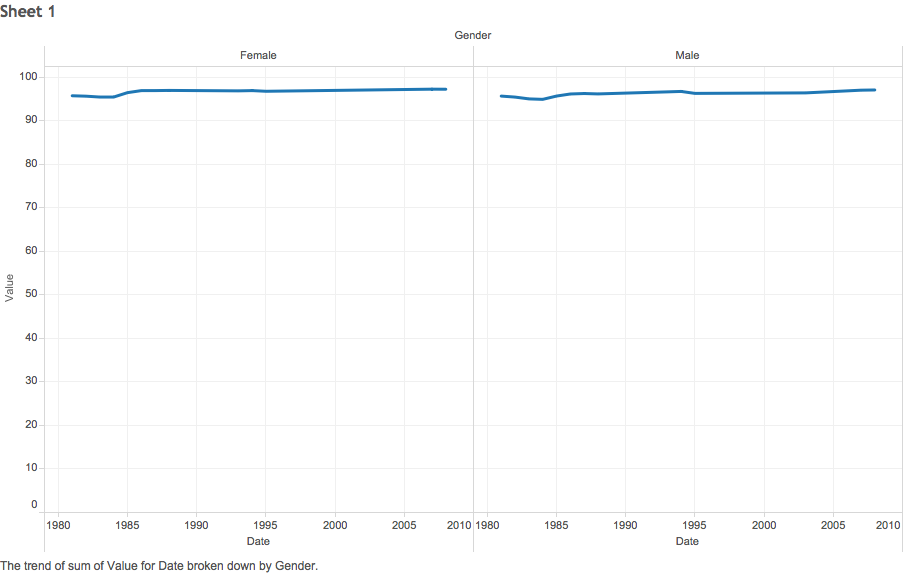

In [71]:
# I now show the image I produced in Tableau.
Image(filename='highincome7.png')

In [72]:
# I then look at middle-income countries.
midincome7 = result7[result7['country_cleaned'] == 'Middle income']
midincome7.to_csv("midincome7.csv")

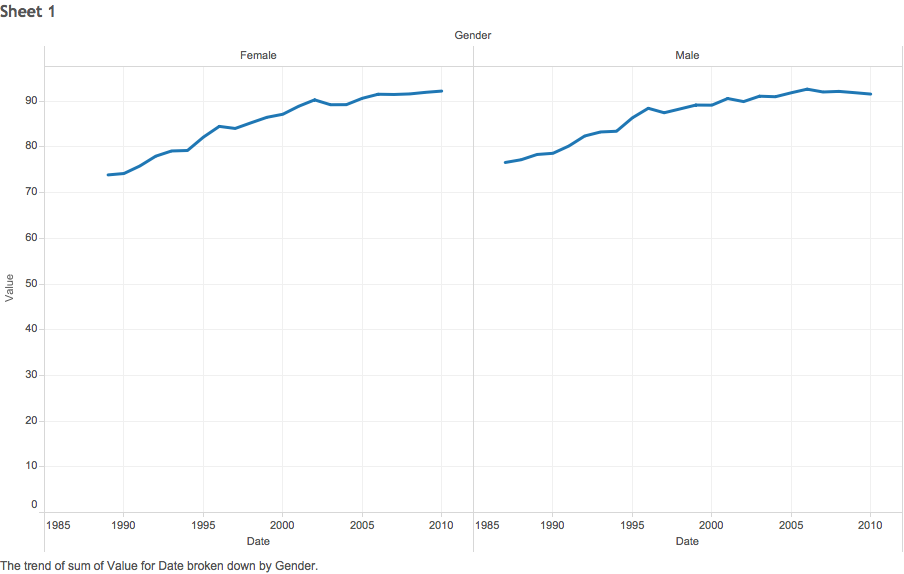

In [73]:
# I now show the image I produced in Tableau.
Image(filename='midincome7.png')

In [74]:
# Finally, I look at the low-income countries.
lowincome7 = result7[result7['country_cleaned'] == 'Low income']
lowincome7.to_csv("lowincome7.csv")

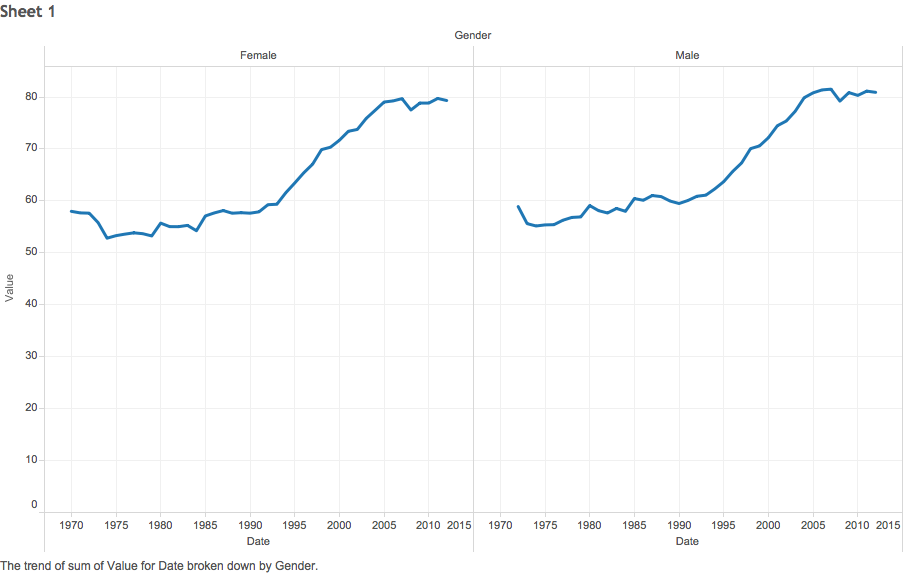

In [75]:
# I now show the image I produced in Tableau.
Image(filename='lowincome7.png')